In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline# Imports

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#SpreadSheet Datafile name
file = 'Datasets.xlsx'

#Load spreadsheet
data = pd.read_excel(file)

#Load Dataset 1 into DataFrame
ds1 = pd.read_excel(file, sheet_names = 'Dataset 1', index_col=0)

In [4]:
ds1.fillna(ds1.median(), inplace=True)
min_max_scaler = preprocessing.MinMaxScaler()
ds1[ds1.columns[5:90]] = min_max_scaler.fit_transform(ds1[ds1.columns[5:90]])
ds1_normalized = pd.DataFrame(ds1)
ds1_normalized.head()

,Team,League/Division,Season,Head Coach,Manager,A,AA,AB,B,BA,...,WW,WX,X,XX,XY,Y,YY,YZ,Z,ZZ
Athlete,,,,,,,,,,,,,,,,,,,,,
1,36,5.0,1,7,13.0,0.894737,0.857143,0.875,0.584098,0.582996,...,0.95,0.827586,1.000000,0.80,1.000000,0.717413,0.733333,0.666667,0.875,0.857143
2,50,5.0,1,7,13.0,1.000000,0.914286,1.000,0.576394,0.582996,...,0.95,0.620690,0.733333,0.56,1.000000,0.717413,0.733333,0.722222,0.875,0.857143
3,41,5.0,1,7,13.0,0.894737,0.714286,0.750,0.564839,0.582996,...,0.95,0.758621,0.766667,0.72,1.000000,0.717413,0.666667,0.861111,0.875,0.857143
4,60,1.0,1,10,29.0,0.947368,0.571429,0.875,0.706530,0.757085,...,0.95,0.655172,0.666667,0.60,0.978947,0.767740,0.166667,1.000000,0.875,1.000000
5,22,1.0,1,10,29.0,0.947368,0.857143,0.750,0.668012,0.757085,...,0.95,0.137931,0.000000,0.60,0.978947,0.767740,0.833333,0.638889,0.750,0.942857


<h2>OO wrt HeadCoach</h2>

“OO”: performance metric, continuous data.

“Head Coach”: metadata, categorical.

Violin plot superposed with box plot.  

The violin plot shows the relationship between the athlete’s head coach and the performance metric OO.


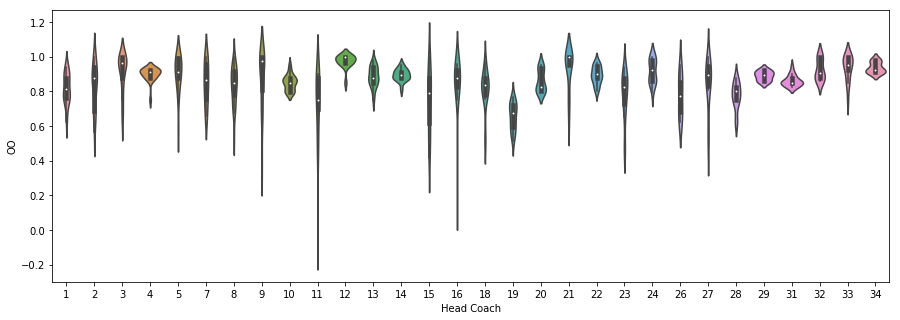

In [5]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Head Coach', y='OO', data=ds1)

<h2> S wrt Manager and Season </h2>

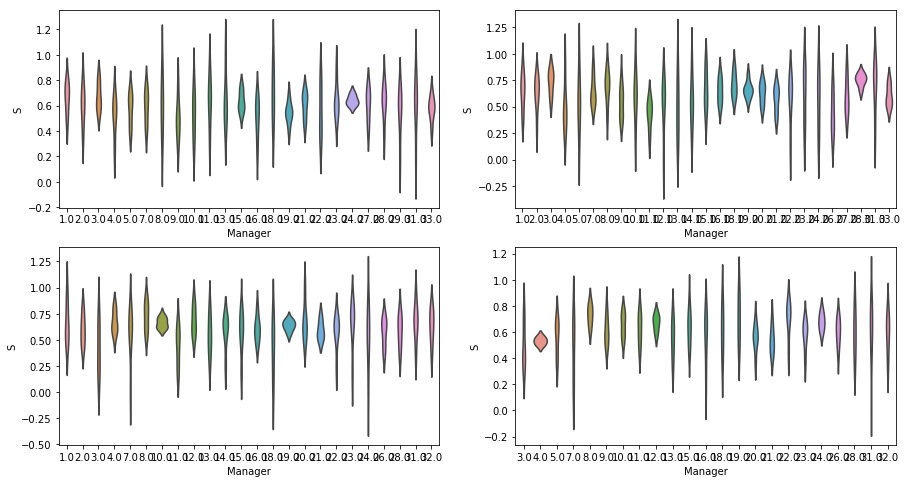

In [247]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.violinplot(x='Manager', y='S', data=ds1[ds1.Season==1], inner=None)
plt.subplot(2,2,2)
sns.violinplot(x='Manager', y='S', data=ds1[ds1.Season==2], inner=None)
plt.subplot(2,2,3)
sns.violinplot(x='Manager', y='S', data=ds1[ds1.Season==3], inner=None)
plt.subplot(2,2,4)
sns.violinplot(x='Manager', y='S', data=ds1[ds1.Season==4], inner=None)

<h2>R wrt HeadCoach and Season</h2>

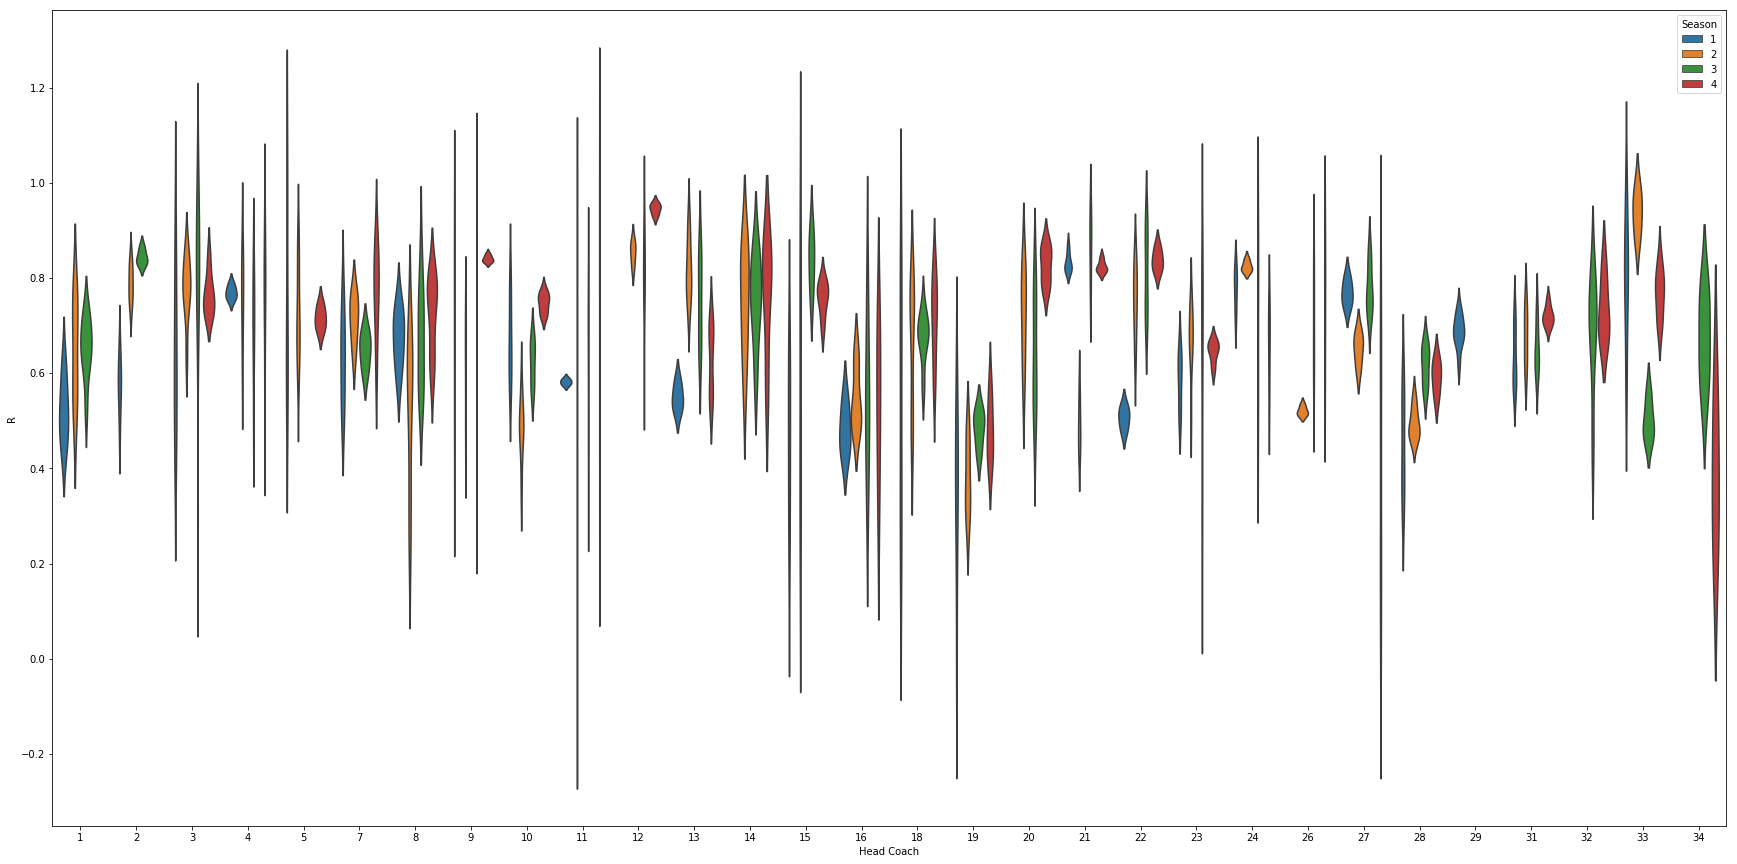

In [21]:
#sns.jointplot(x='Head Coach', y='R', data=ds1, kind='reg', color='g')
#sns.jointplot(x='Head Coach', y='R', data=ds1[ds1.Season == 1], kind='reg', color='b')
#sns.jointplot(x='Head Coach', y='R', data=ds1[ds1.Season == 2], kind='reg', color='c')
#sns.jointplot(x='Head Coach', y='R', data=ds1[ds1.Season == 3], kind='reg', color='y')
#sns.jointplot(x='Head Coach', y='R', data=ds1[ds1.Season == 4], kind='reg', color='m')

plt.figure(figsize=(30,15))
sns.violinplot(x="Head Coach", y="R", hue="Season", data=ds1, inner=None)

<h2>NN wrt OO and Season</h2>

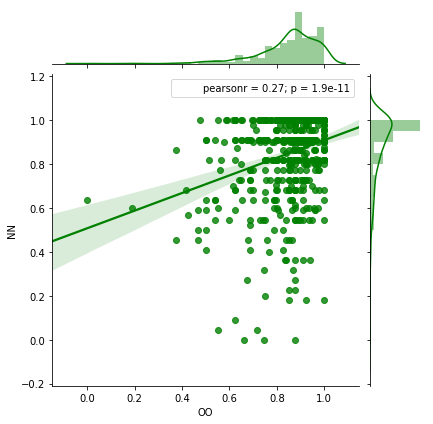

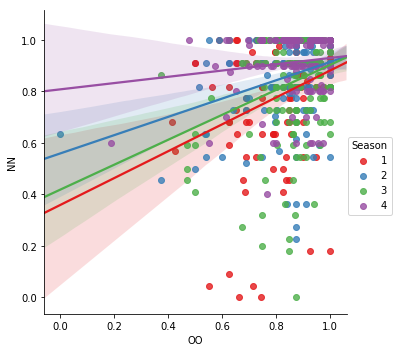

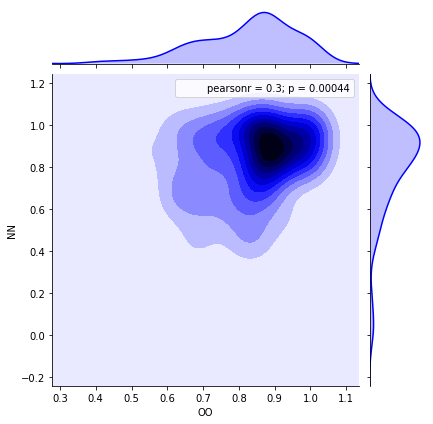

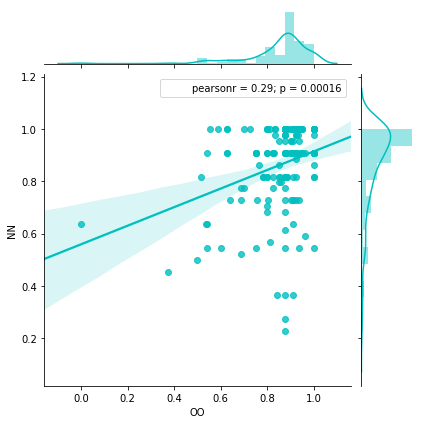

In [ ]:
# NN wrt OO and Season

sns.jointplot(x='OO', y='NN', data=ds1,color='g', kind='reg')

#To visualise all 4 regression lines on one graph
sns.lmplot(x='OO', y='NN', data=ds1, hue='Season', palette='Set1')

sns.jointplot(x='OO', y='NN', data=ds1[ds1.Season==1], color='b', kind='kde')
sns.jointplot(x='OO', y='NN', data=ds1[ds1.Season==2], color='c', kind='reg')
sns.jointplot(x='OO', y='NN', data=ds1[ds1.Season==3], color='m', kind='reg')
sns.jointplot(x='OO', y='NN', data=ds1[ds1.Season==4], color='r', kind='reg')

#I think we should add 4 graphs KDE here -Yas


Analysis:
Pearson's r measures the linear correlation between our two continuous variables OO and NN.

If r close to 1: there is a strong relationship (correlation) between the two variables.

If r close to 0: weak relationship between the variables, so changes in one variable are not correlated with changes in second variable.

If r > 0: as one variable increases (decreases) in value, the second increases (decreases) as well. 



All 4 regression lines have close r coefficients in the interval [0.12,0.3]. The coefficient is positive for all seasons, so the higher the OO, the higher the NN. However, r is relatively low, so the relationship between NN and OO is moderate.

All 4 regression lines seem to intersect at (1,0.9), we can use KDE to show that most points are concentrated around that area (check one of the graphs).




<h2>OO wrt JI and Season</h2>

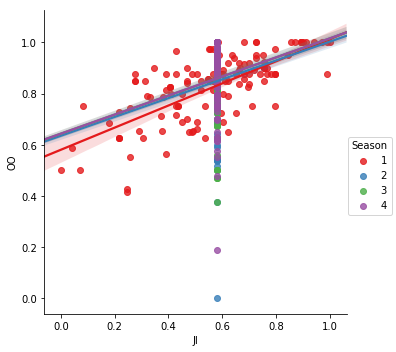

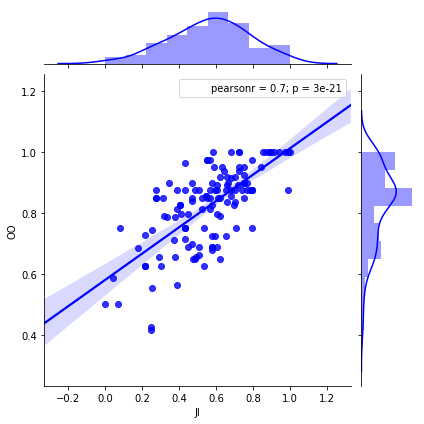

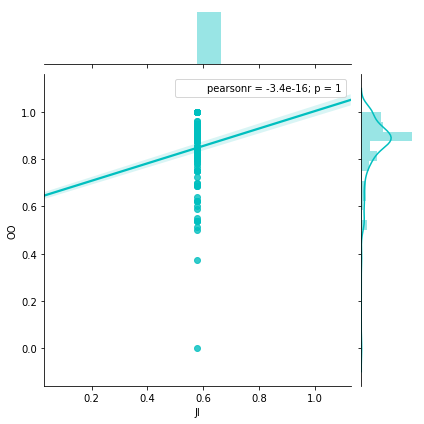

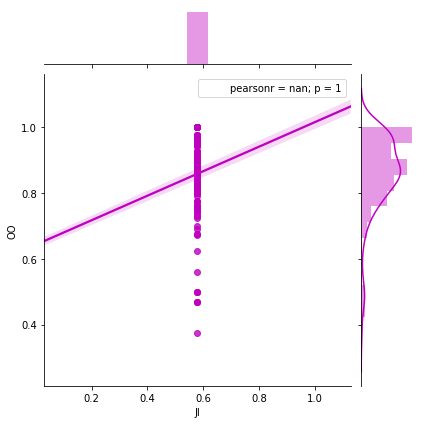

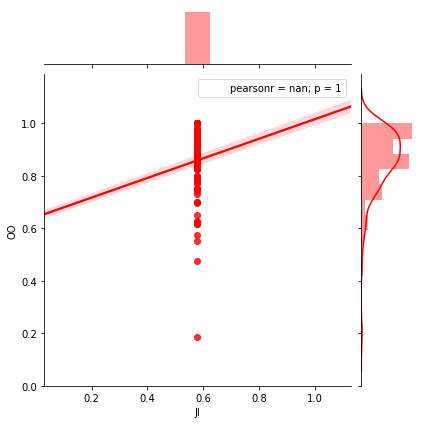

In [33]:
# OO wrt JI and Season
#sns.jointplot(x='JI', y='OO', data=ds1, color='g', kind='reg')

sns.lmplot(x='JI', y='OO', data=ds1, hue='Season', palette='Set1')
sns.jointplot(x='JI', y='OO', data=ds1[ds1.Season==1], color='b', kind='reg')
sns.jointplot(x='JI', y='OO', data=ds1[ds1.Season==2], color='c', kind='reg')
sns.jointplot(x='JI', y='OO', data=ds1[ds1.Season==3], color='m', kind='reg')
sns.jointplot(x='JI', y='OO', data=ds1[ds1.Season==4], color='r', kind='reg')

Analysis:

Season 1: r = 0.7

Season 2, 3, 4: r = 0.

JI and OO are correlated only during Season 1. During the rest of the seasons, there is no relationship between JI and OO. 

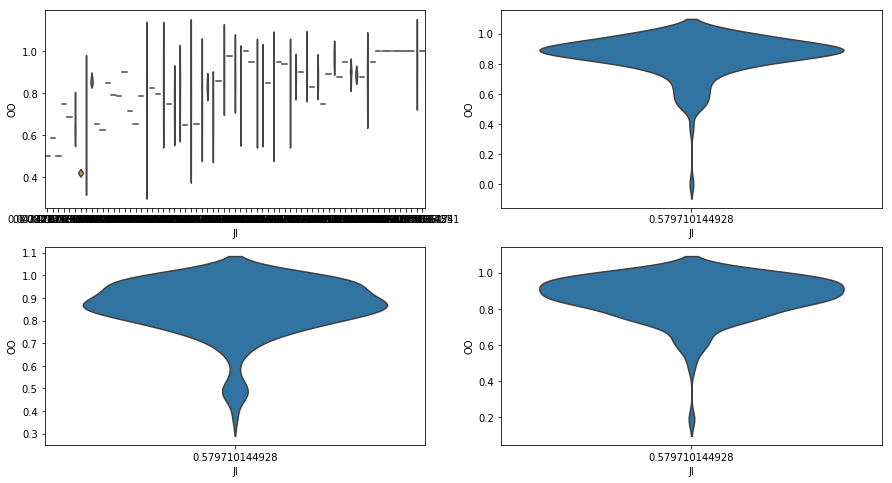

In [261]:
#I think there's no need for this -Yasmin

plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.violinplot(x='JI', y='OO', data=ds1[ds1.Season==1], inner=None)
plt.subplot(2,2,2)
sns.violinplot(x='JI', y='OO', data=ds1[ds1.Season==2], inner=None)
plt.subplot(2,2,3)
sns.violinplot(x='JI', y='OO', data=ds1[ds1.Season==3], inner=None)
plt.subplot(2,2,4)
sns.violinplot(x='JI', y='OO', data=ds1[ds1.Season==4], inner=None)

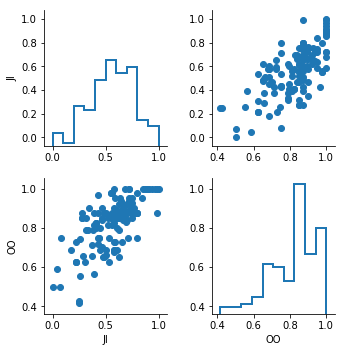

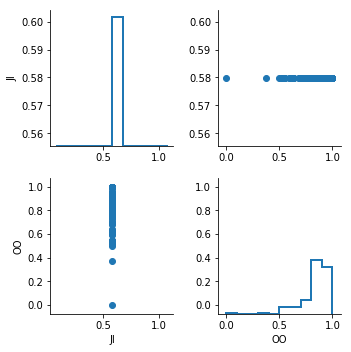

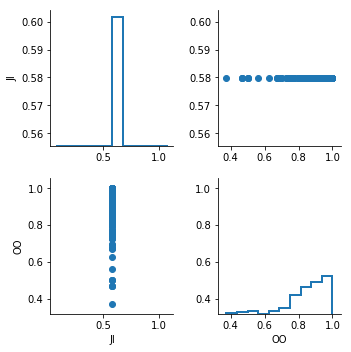

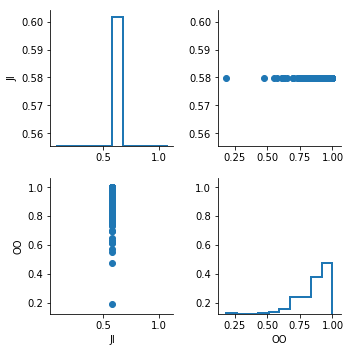

In [129]:
#I think this is useless, leaving it for your opinion
sec = sns.PairGrid(ds1[ds1.Season == 1], vars=['JI', 'OO'])
sec = sec.map_diag(plt.hist, histtype='step', linewidth=2)
sec = sec.map_offdiag(plt.scatter)

sec = sns.PairGrid(ds1[ds1.Season == 2], vars=['JI', 'OO'])
sec = sec.map_diag(plt.hist, histtype='step', linewidth=2)
sec = sec.map_offdiag(plt.scatter)

sec = sns.PairGrid(ds1[ds1.Season == 3], vars=['JI', 'OO'])
sec = sec.map_diag(plt.hist, histtype='step', linewidth=2)
sec = sec.map_offdiag(plt.scatter)

sec = sns.PairGrid(ds1[ds1.Season == 4], vars=['JI', 'OO'])
sec = sec.map_diag(plt.hist, histtype='step', linewidth=2)
sec = sec.map_offdiag(plt.scatter)

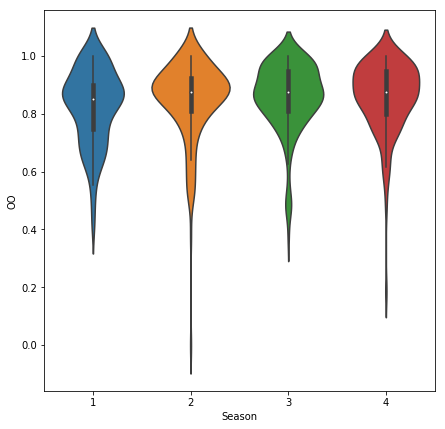

In [253]:
# OO wrt Season
plt.figure(figsize=(7,7))
sns.violinplot(x='Season', y='OO', data=ds1)

<h2>HG wrt Y and Season</h2>

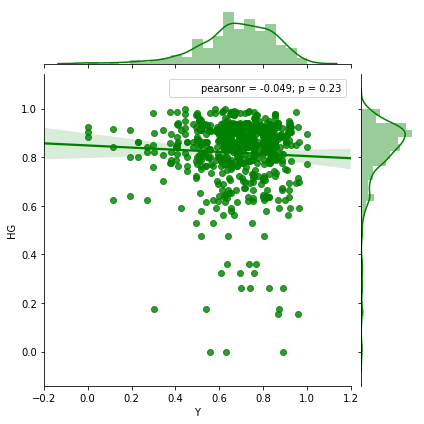

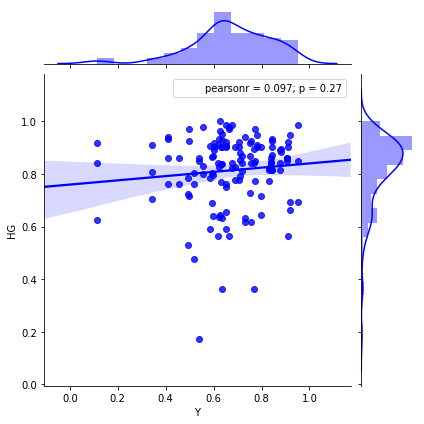

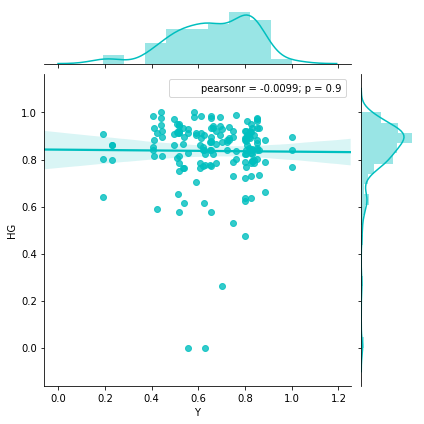

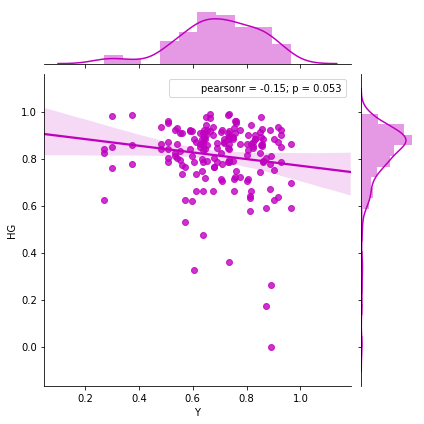

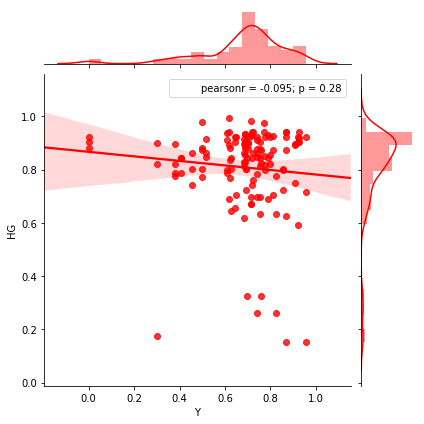

In [258]:
# HG wrt Y and Season
sns.jointplot(x='Y', y='HG', data=ds1, color='g', kind='reg')
sns.jointplot(x='Y', y='HG', data=ds1[ds1.Season==1], color='b', kind='reg')
sns.jointplot(x='Y', y='HG', data=ds1[ds1.Season==2], color='c', kind='reg')
sns.jointplot(x='Y', y='HG', data=ds1[ds1.Season==3], color='m', kind='reg')
sns.jointplot(x='Y', y='HG', data=ds1[ds1.Season==4], color='r', kind='reg')

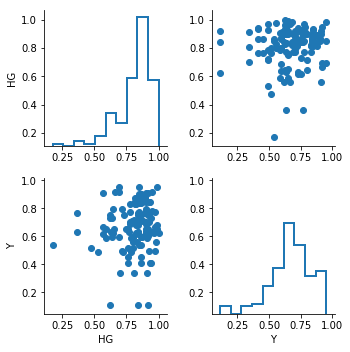

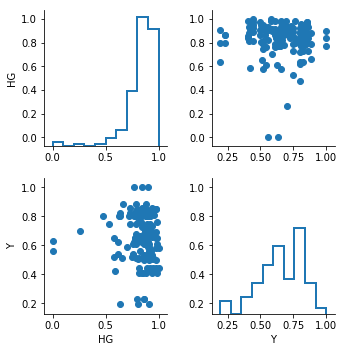

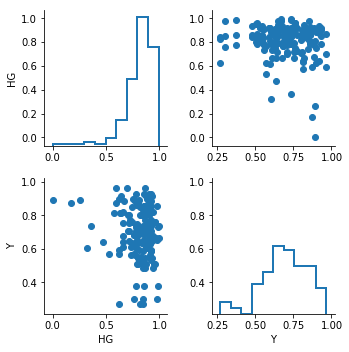

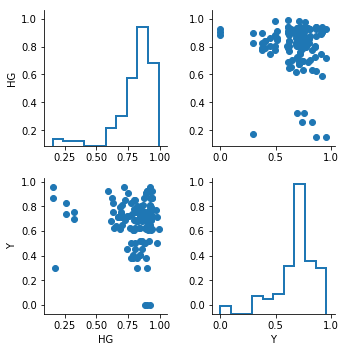

In [141]:
# HG wrt Y and Season
sec = sns.PairGrid(ds1[ds1.Season==1], vars=['HG', 'Y'])
sec = sec.map_diag(plt.hist, histtype='step', linewidth=2)
sec = sec.map_offdiag(plt.scatter)

sec = sns.PairGrid(ds1[ds1.Season==2], vars=['HG', 'Y'])
sec = sec.map_diag(plt.hist, histtype='step', linewidth=2)
sec = sec.map_offdiag(plt.scatter)

sec = sns.PairGrid(ds1[ds1.Season==3], vars=['HG', 'Y'])
sec = sec.map_diag(plt.hist, histtype='step', linewidth=2)
sec = sec.map_offdiag(plt.scatter)

sec = sns.PairGrid(ds1[ds1.Season==4], vars=['HG', 'Y'])
sec = sec.map_diag(plt.hist, histtype='step', linewidth=2)
sec = sec.map_offdiag(plt.scatter)

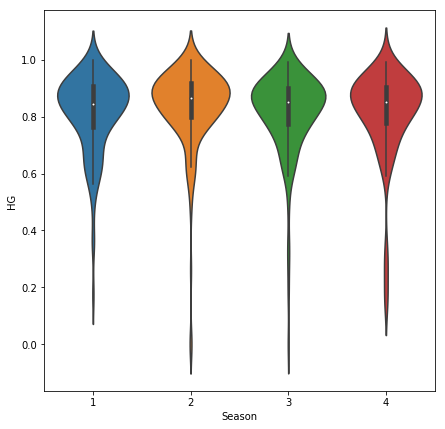

In [257]:
# HG wrt Season
plt.figure(figsize=(7,7))
sns.violinplot(x='Season', y='HG', data=ds1)

Analysis: point out that throughout the seasons, HG varies little. The median is approximately the same, the distribution as well. (Btw how does 2 & 3 have a negative value for minimum???)

<h2>B wrt League/Division and Season</h2>

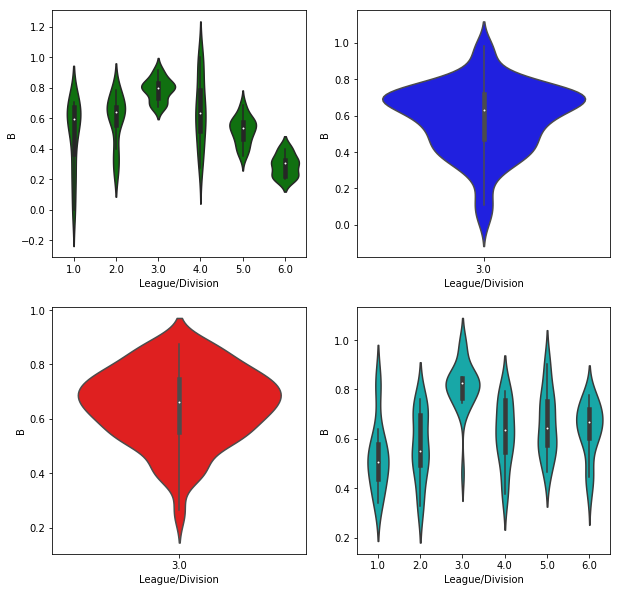

In [165]:
#B wrt League/Division and Season
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
sns.violinplot(data=ds1[ds1.Season==1], x='League/Division', y='B', ax=ax1, color='g')
sns.violinplot(data=ds1[ds1.Season==2], x='League/Division', y='B', ax=ax2, color='b')
sns.violinplot(data=ds1[ds1.Season==3], x='League/Division', y='B', ax=ax3, color='r')
sns.violinplot(data=ds1[ds1.Season==4], x='League/Division', y='B', ax=ax4, color='c')

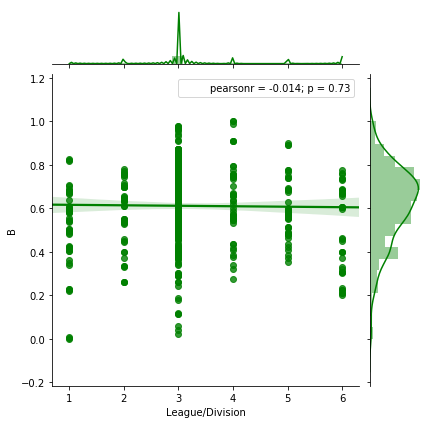

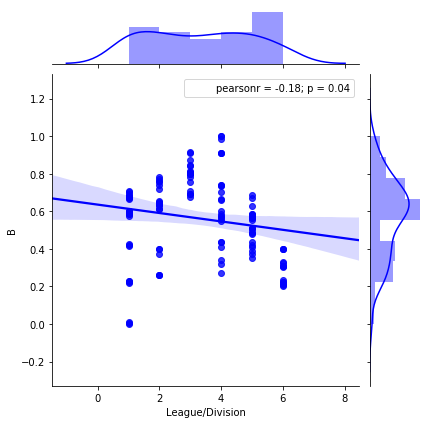

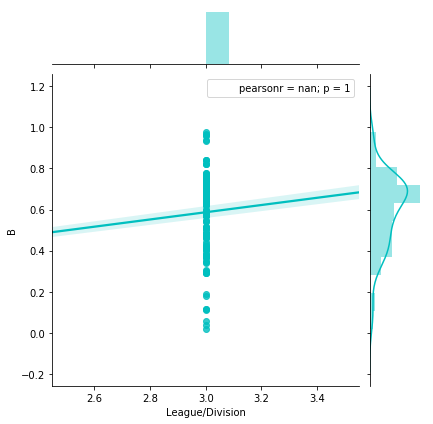

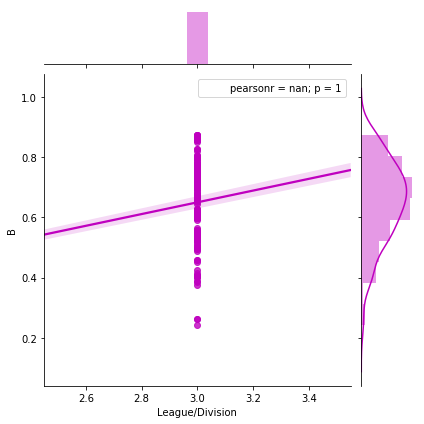

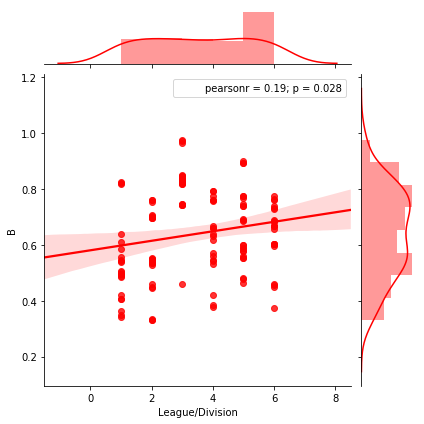

In [34]:
# I think this should be deleted because we can't use regression for categorical data -Yas

# idk what's up with the error message
sns.jointplot(x='League/Division', y='B', data=ds1, color='g', kind='reg')
sns.jointplot(x='League/Division', y='B', data=ds1[ds1.Season==1], color='b', kind='reg')
sns.jointplot(x='League/Division', y='B', data=ds1[ds1.Season==2], color='c', kind='reg')
sns.jointplot(x='League/Division', y='B', data=ds1[ds1.Season==3], color='m', kind='reg')
sns.jointplot(x='League/Division', y='B', data=ds1[ds1.Season==4], color='r', kind='reg')

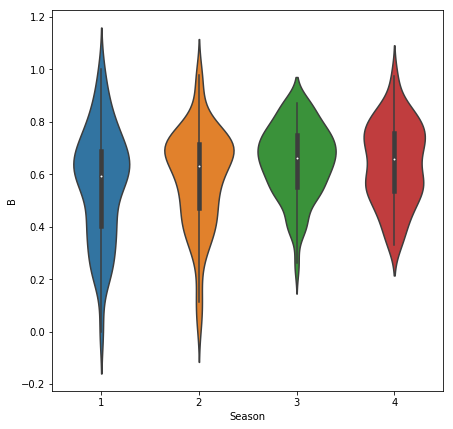

In [256]:
# B wrt Season
plt.figure(figsize=(7,7))
sns.violinplot(x='Season', y='B', data=ds1)

<h1>Prediction</h1>

<h2>Predict feature “R” given “Head coach”, “B”, “S”, “HG”, “HH”, and “OO”</h2>

In [287]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn import linear_model
from sklearn.svm import SVR

In [309]:
X = ds1[['B','S','HG','HH','OO']]
y = ds1['R']

cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=0.25, train_size=0.75, random_state=42)
cv_res = model_selection.cross_validate(linear_model.LinearRegression(), X, y, cv = cv_split)
print('LinearRegression TrainScore: ' + str(cv_res['train_score'].mean()))
print('LinearRegression TestScore: ' + str(cv_res['test_score'].mean()))

LinearRegression TrainScore: 0.704376682115
LinearRegression TestScore: 0.702474162943


In [310]:
#Linear Regression differently
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#reg = linear_model.LinearRegression()
#reg.fit(X_train, y_train)
#y_pred = reg.predict(X_test)

#print("R^2: {}".format(reg.score(X_test, y_test)))
#print("R^2: {}".format(reg.score(X_train, y_train)))
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7312282308234339
R^2: 0.6884399984316842
Root Mean Squared Error: 0.08822970834509108


In [379]:
#Different regressor instances
regressors = [
    linear_model.LinearRegression(),
    linear_model.HuberRegressor(),
    linear_model.BayesianRidge(normalize=True),
    linear_model.Lasso(alpha=1e-4),
    linear_model.LassoLarsIC(),
    linear_model.Ridge(),
    SVR(kernel='linear'),
]

In [388]:
# Method 1
def predictor1(regressors, X, y):
    cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=0.25, train_size=0.75, random_state=42)
    results1 = pd.DataFrame(columns=['Name', 'Train Score', 'Test Score'])
    index = 0
    for reg in regressors:
        cv_results1 = model_selection.cross_validate(reg, X, y, cv = cv_split)
        results1.loc[index, 'Name'] = reg.__class__.__name__
        results1.loc[index, 'Train Score'] = cv_results['train_score'].mean()
        results1.loc[index, 'Test Score'] = cv_results['test_score'].mean()
        index = index + 1
    return results1

In [389]:
# Method 2
def predictor2(regressors, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
    results2 = pd.DataFrame(columns=['Name', 'Train Score', 'Test Score', 'RMSE'])
    index2 = 0

    for reg in regressors:
        reg.fit(X_train,y_train)
        y_pred = reg.predict(X_test)

        #Filling panda DataFrame table of results
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results2.loc[index2, 'Name'] = reg.__class__.__name__
        results2.loc[index2, 'Train Score'] = reg.score(X_train, y_train)
        results2.loc[index2, 'Test Score'] = reg.score(X_test, y_test)
        results2.loc[index2, 'RMSE'] = rmse

        index2 = index2 + 1
    return results2

In [390]:
table1 = predictor1(regressors, X, y)
table2 = predictor2(regressors, X, y)

In [392]:
table1

,Name,Train Score,Test Score
0,LinearRegression,0.698617,0.696525
1,HuberRegressor,0.698617,0.696525
2,BayesianRidge,0.698617,0.696525
3,Lasso,0.698617,0.696525
4,LassoLarsIC,0.698617,0.696525
5,Ridge,0.698617,0.696525
6,SVR,0.698617,0.696525


In [393]:
table2

,Name,Train Score,Test Score,RMSE
0,LinearRegression,0.68844,0.731228,0.0882297
1,HuberRegressor,0.685415,0.731403,0.0882011
2,BayesianRidge,0.688419,0.730626,0.0883284
3,Lasso,0.688295,0.731069,0.0882559
4,LassoLarsIC,0.686361,0.725775,0.0891203
5,Ridge,0.68489,0.718469,0.0902997
6,SVR,0.683753,0.722253,0.0896907
